# DIABLO- miRNA-mRNA networks in different Breast Cancer subtypes


### INSTALLS



In [ ]:
#pip install pandas


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\arati\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
#pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\arati\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
#pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\arati\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### IMPORTS

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, auc
from pandas.plotting import parallel_coordinates
import seaborn as sns
from matplotlib import colormaps
from matplotlib import cm

## Model Performance- Features Tunning

In [2]:
features_metrics = pd.DataFrame(data= [[150, 120, 150, 100, 0.896, 0.793, 0.793, 0.793, 0.22], [150, 150,180, 150, 0.844, 0.689, 0.689, 0.689, 0.392],
                                    [120, 80, 150, 80, 0.885, 0.77, 0.77, 0.77, 0.249], [150, 80, 150, 120, 0.89, 0.78, 0.78, 0.78, 0.21],
                                    [130, 50, 130, 130, 0.936, 0.873, 0.873, 0.873, 0.117], [20, 30, 50, 50, 0.856, 0.712, 0.712, 0.712, 0.277],
                                    [130, 50, 120, 120, 0.9425, 0.885, 0.885, 0.885, 0.107], [140, 40, 140, 130, 0.931, 0.86, 0.86, 0.86, 0.126],
                                    [140, 40, 140, 120, 0.931, 0.862, 0.862, 0.862, 0.126], [130, 40, 140, 140, 0.913, 0.827, 0.827, 0.827, 0.188]],
                                    columns = ['miRNAComp1', 'miRNAComp2', 'mRNAComp1', 'mRNAComp2', 'accuracy', 'precision','recall', 'F1', 'BER'])
features_metrics= features_metrics.sort_values(by='F1', ascending=False)
features_metrics['Sum#Features'] = features_metrics.loc[:, ['miRNAComp1', 'miRNAComp2', 'mRNAComp1', 'mRNAComp2']].sum(axis = 1)

In [3]:
features_metrics['Model'] = features_metrics.index.map(lambda i :  'Model ' + str(i))
features_metrics = features_metrics.sort_values(by = 'Model')

In [4]:
features_metrics

miRNAComp1  miRNAComp2  mRNAComp1  mRNAComp2  accuracy  precision  recall  \
0         150         120        150        100    0.8960      0.793   0.793   
1         150         150        180        150    0.8440      0.689   0.689   
2         120          80        150         80    0.8850      0.770   0.770   
3         150          80        150        120    0.8900      0.780   0.780   
4         130          50        130        130    0.9360      0.873   0.873   
5          20          30         50         50    0.8560      0.712   0.712   
6         130          50        120        120    0.9425      0.885   0.885   
7         140          40        140        130    0.9310      0.860   0.860   
8         140          40        140        120    0.9310      0.862   0.862   
9         130          40        140        140    0.9130      0.827   0.827   

      F1    BER  Sum#Features    Model  
0  0.793  0.220           520  Model 0  
1  0.689  0.392           630  Model 1  
2  0.770  0.249           430  Model 2  
3  0.780  0.210           500  Model 3  
4  0.873  0.117           440  Model 4  
5  0.712  0.277           150  Model 5  
6  0.885  0.107           420  Model 6  
7  0.860  0.126           450  Model 7  
8  0.862  0.126           440  Model 8  
9  0.827  0.188           450  Model 9

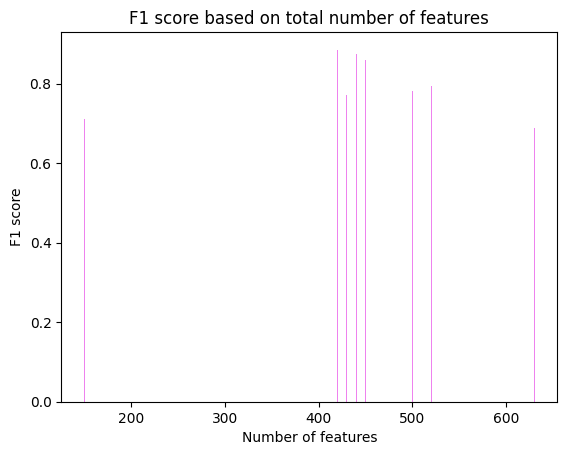

In [5]:
'''Plot a bar plot based for
F1-score based on total number of features.'''

plt.figure()
plt.bar(features_metrics['Sum#Features'],features_metrics['F1'], color = 'violet' )
plt.title('F1 score based on total number of features')
plt.xlabel('Number of features')
plt.ylabel('F1 score')
plt.show()

In [6]:
data_ft = features_metrics.drop(columns = ['accuracy', 'precision', 'recall', 'BER','Sum#Features', 'F1'])
data_ft

miRNAComp1  miRNAComp2  mRNAComp1  mRNAComp2    Model
0         150         120        150        100  Model 0
1         150         150        180        150  Model 1
2         120          80        150         80  Model 2
3         150          80        150        120  Model 3
4         130          50        130        130  Model 4
5          20          30         50         50  Model 5
6         130          50        120        120  Model 6
7         140          40        140        130  Model 7
8         140          40        140        120  Model 8
9         130          40        140        140  Model 9

In [7]:
data_proc = features_metrics[['Model', 'F1']]
data_proc.set_index('Model', inplace= True)
data_proc= data_proc.sort_values(by= 'F1', ascending= False)

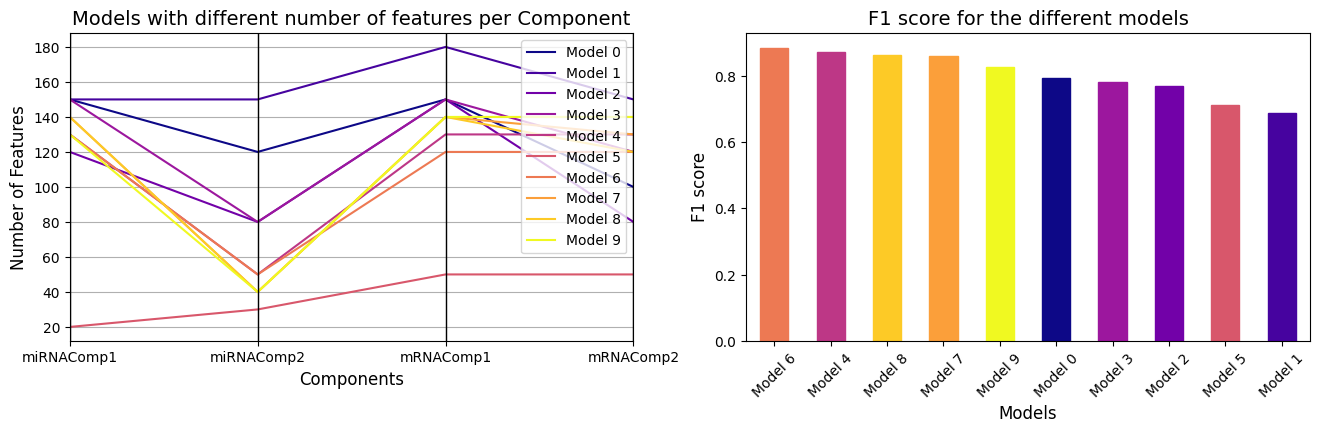

In [ ]:
'''Plot which ilustrates the number of features per component
in each tested model, and the correspondent F1-score.'''

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 4))
parallel_coordinates(data_ft, 'Model', colormap=plt.get_cmap("plasma"), ax = ax[0])
ax[0].set_title('Models with different number of features per Component', fontsize=14)
ax[0].set_xlabel('Components', fontsize=12)
ax[0].set_ylabel('Number of Features', fontsize=12)
bars = data_proc.plot(kind = 'bar', ax= ax[1], colormap = 'plasma')
ax[1].set_title('F1 score for the different models', fontsize=14)
ax[1].set_xlabel('Models', fontsize=12)
ax[1].set_ylabel('F1 score', fontsize=12)
plt.legend().remove()
plt.xticks(rotation = 45)
colors = [[0.928329, 0.472975, 0.326067, 1.      ], [0.740143, 0.213864, 0.524216, 1.      ], [0.991209, 0.790537, 0.149377, 1.      ],
        [0.983041, 0.624131, 0.227937, 1.      ], [0.940015, 0.975158, 0.131326, 1.      ], [0.050383, 0.029803, 0.527975, 1.      ],
        [0.610667, 0.090204, 0.619951, 1.      ], [0.447714, 0.00208 , 0.66024 , 1.      ], [0.846788, 0.342551, 0.420579, 1.      ],[0.274191, 0.012109, 0.622722, 1.      ]]     
for bar, color in zip(bars.patches, colors):
    bar.set_color(color)
plt.show()

## Design-Matrix

In [15]:

design = pd.DataFrame(data = [[0.3, 0.3,0.890, 0.781, 0.781, 0.781, 0.19], [0.5, 0.5, 0.879, 0.758, 0.758, 0.758, 0.229], [0.7, 0.7, 0.867, 0.735, 0.735, 0.735, 0.262],
                              [0.2, 0.2, 0.896, 0.793, 0.793, 0.793, 0.185],[0.5, 0.3, 0.890, 0.781, 0.781, 0.781, 0.195 ],[0.3, 0.5, 0.885, 0.77, 0.77, 0.77, 0.20 ],
                              [0.7, 0.3, 0.885, 0.77, 0.77, 0.77, 0.20  ],[0.1, 0.1, 0.913, 0.827, 0.827, 0.827, 0.15],[0.1, 0.2, 0.896, 0.793, 0.793, 0.793, 0.185 ],
                              [0.2, 0.1, 0.919, 0.839, 0.839, 0.839, 0.143],[0.3, 0.1,0.919, 0.839, 0.839, 0.839, 0.143],[0.4, 0.1, 0.919, 0.839, 0.839, 0.839, 0.143],
                              [0.4, 0.2, 0.890, 0.781, 0.781, 0.781, 0.21], [0.7, 0.1, 0.919, 0.839, 0.839, 0.839, 0.143], [0.9, 0.1, 0.919, 0.839, 0.839, 0.839, 0.143],
                              [0.2, 0.05, 0.919, 0.839, 0.839, 0.839, 0.146], [0,0, 0.948, 0.896, 0.896, 0.896, 0.102], [0.3,0, 0.948, 0.896, 0.896, 0.896, 0.102],
                              [0.7,0, 0.948, 0.896, 0.896, 0.896, 0.102], [0.3, 0.05, 0.931, 0.862, 0.862, 0.862, 0.129], ], columns = ['12', '21', 'Accuracy', 'Precision', 'Recall', 'F1', 'BER'])
design = design.sort_values(by = 'F1', ascending = False)
design['Design'] = design.index.map(lambda i : 'Design ' + str(i) + ' + Model 6')
design

12    21  Accuracy  Precision  Recall     F1    BER               Design
18  0.7  0.00     0.948      0.896   0.896  0.896  0.102  Design 18 + Model 6
17  0.3  0.00     0.948      0.896   0.896  0.896  0.102  Design 17 + Model 6
16  0.0  0.00     0.948      0.896   0.896  0.896  0.102  Design 16 + Model 6
19  0.3  0.05     0.931      0.862   0.862  0.862  0.129  Design 19 + Model 6
9   0.2  0.10     0.919      0.839   0.839  0.839  0.143   Design 9 + Model 6
15  0.2  0.05     0.919      0.839   0.839  0.839  0.146  Design 15 + Model 6
14  0.9  0.10     0.919      0.839   0.839  0.839  0.143  Design 14 + Model 6
13  0.7  0.10     0.919      0.839   0.839  0.839  0.143  Design 13 + Model 6
11  0.4  0.10     0.919      0.839   0.839  0.839  0.143  Design 11 + Model 6
10  0.3  0.10     0.919      0.839   0.839  0.839  0.143  Design 10 + Model 6
7   0.1  0.10     0.913      0.827   0.827  0.827  0.150   Design 7 + Model 6
8   0.1  0.20     0.896      0.793   0.793  0.793  0.185   Design 8 + Model 6
3   0.2  0.20     0.896      0.793   0.793  0.793  0.185   Design 3 + Model 6
12  0.4  0.20     0.890      0.781   0.781  0.781  0.210  Design 12 + Model 6
4   0.5  0.30     0.890      0.781   0.781  0.781  0.195   Design 4 + Model 6
0   0.3  0.30     0.890      0.781   0.781  0.781  0.190   Design 0 + Model 6
6   0.7  0.30     0.885      0.770   0.770  0.770  0.200   Design 6 + Model 6
5   0.3  0.50     0.885      0.770   0.770  0.770  0.200   Design 5 + Model 6
1   0.5  0.50     0.879      0.758   0.758  0.758  0.229   Design 1 + Model 6
2   0.7  0.70     0.867      0.735   0.735  0.735  0.262   Design 2 + Model 6

In [16]:
new_df = design.drop(index= [15, 14, 11, 10, 8, 12, 5, 7, 1, 17])
new_df = new_df.reset_index()
new_df = new_df.drop(columns = 'index')
new_df['Design'] = new_df.index.map(lambda i: 'Design ' + str(i) + ' +  Model 6')
new_df = pd.concat([pd.DataFrame([[0, 0,0.9425, 0.885, 0.885, 0.885, 0.107, 'Correlation + Model 6']], columns=new_df.columns), new_df], ignore_index=True)
new_df

12    21  Accuracy  Precision  Recall     F1    BER  \
0   0.0  0.00    0.9425      0.885   0.885  0.885  0.107   
1   0.7  0.00    0.9480      0.896   0.896  0.896  0.102   
2   0.0  0.00    0.9480      0.896   0.896  0.896  0.102   
3   0.3  0.05    0.9310      0.862   0.862  0.862  0.129   
4   0.2  0.10    0.9190      0.839   0.839  0.839  0.143   
5   0.7  0.10    0.9190      0.839   0.839  0.839  0.143   
6   0.2  0.20    0.8960      0.793   0.793  0.793  0.185   
7   0.5  0.30    0.8900      0.781   0.781  0.781  0.195   
8   0.3  0.30    0.8900      0.781   0.781  0.781  0.190   
9   0.7  0.30    0.8850      0.770   0.770  0.770  0.200   
10  0.7  0.70    0.8670      0.735   0.735  0.735  0.262   

                   Design  
0   Correlation + Model 6  
1     Design 0 +  Model 6  
2     Design 1 +  Model 6  
3     Design 2 +  Model 6  
4     Design 3 +  Model 6  
5     Design 4 +  Model 6  
6     Design 5 +  Model 6  
7     Design 6 +  Model 6  
8     Design 7 +  Model 6  
9     Design 8 +  Model 6  
10    Design 9 +  Model 6

In [17]:
data = new_df[['Design', 'F1']]
data.set_index('Design', inplace= True)
data.index.name = None
data.drop
data

F1
Correlation + Model 6  0.885
Design 0 +  Model 6    0.896
Design 1 +  Model 6    0.896
Design 2 +  Model 6    0.862
Design 3 +  Model 6    0.839
Design 4 +  Model 6    0.839
Design 5 +  Model 6    0.793
Design 6 +  Model 6    0.781
Design 7 +  Model 6    0.781
Design 8 +  Model 6    0.770
Design 9 +  Model 6    0.735

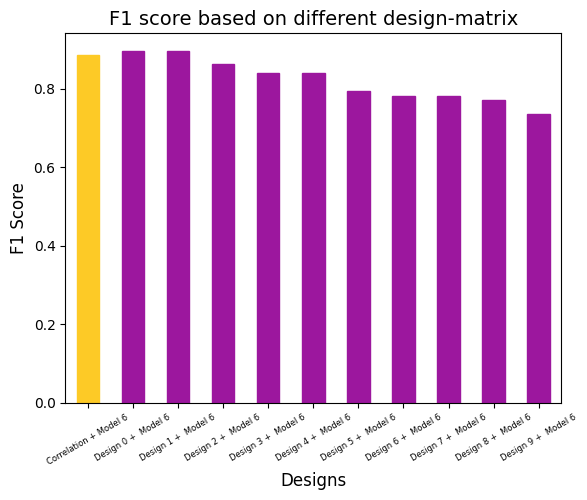

In [18]:
bars = data.plot(kind = 'bar')
plt.xlabel('Designs', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title('F1 score based on different design-matrix', fontsize=14)
plt.xticks(size = 6, rotation = 30)
colors = [[0.991209, 0.790537, 0.149377, 1.      ], [0.610667, 0.090204, 0.619951, 1.      ], [0.610667, 0.090204, 0.619951, 1.      ], [0.610667, 0.090204, 0.619951, 1.      ],
        [0.610667, 0.090204, 0.619951, 1.      ], [0.610667, 0.090204, 0.619951, 1.      ], [0.610667, 0.090204, 0.619951, 1.      ], [0.610667, 0.090204, 0.619951, 1.      ],
        [0.610667, 0.090204, 0.619951, 1.      ], [0.610667, 0.090204, 0.619951, 1.      ], [0.610667, 0.090204, 0.619951, 1.      ]]     
plt.legend().remove()
for bar, color in zip(bars.patches, colors):
    bar.set_color(color)
plt.show()

### Model Performance

In [19]:
df= pd.DataFrame([[130, 50, 120, 120, 0.7, 0.00, 0.9480, 0.896, 0.896, 0.896, 0.102, 'Design 0 + Model 6']],
                 columns = ['miRNAComp1', 'miRNAComp2', 'mRNAComp1', 'mRNAComp2','12', '21', 'accuracy', 'precision', 'recall', 'F1', 'BER', 'Design Matrx'])

In [20]:
df

miRNAComp1  miRNAComp2  mRNAComp1  mRNAComp2   12   21  accuracy  \
0         130          50        120        120  0.7  0.0     0.948   

   precision  recall     F1    BER        Design Matrx  
0      0.896   0.896  0.896  0.102  Design 0 + Model 6

## Plots

### Plot Indiv

In [21]:
data_Indiv = pd.read_csv(os.path.join('..', 'PBCM', 'plotsData', 'Plot_Indiv_Data.csv' ))
data_Indiv

Unnamed: 0          x         y       group         Block  pch  \
0     TCGA.A1.A0SE.01   5.204504  2.993116   Luminal A  Block: miRNA   19   
1     TCGA.A1.A0SJ.01   1.677877  1.527673   Luminal A  Block: miRNA   19   
2     TCGA.A1.A0SK.01 -13.016925  1.650031  Basal-like  Block: miRNA   19   
3     TCGA.A1.A0SM.01   4.010084 -1.107759   Luminal B  Block: miRNA   19   
4     TCGA.A1.A0SO.01 -15.356512 -3.873585  Basal-like  Block: miRNA   19   
..                ...        ...       ...         ...           ...  ...   
355  TCGA.BH.A0HU.011  -0.028129 -7.577399   Luminal B   Block: mRNA   19   
356  TCGA.BH.A0W3.011   5.758562 -7.025970   Luminal B   Block: mRNA   19   
357  TCGA.BH.A0W4.011   3.981708  4.754115   Luminal A   Block: mRNA   19   
358  TCGA.BH.A0W5.011   2.693418  6.913077   Luminal A   Block: mRNA   19   
359  TCGA.BH.A0WA.011 -16.258730  3.744591  Basal-like   Block: mRNA   19   

     pch.levels  cex      col  pch.legend  
0            19    1  #C2C2C2          19  
1            19    1  #C2C2C2          19  
2            19    1  #388ECC          19  
3            19    1  #009E73          19  
4            19    1  #388ECC          19  
..          ...  ...      ...         ...  
355          19    1  #009E73          19  
356          19    1  #009E73          19  
357          19    1  #C2C2C2          19  
358          19    1  #C2C2C2          19  
359          19    1  #388ECC          19  

[360 rows x 10 columns]

In [22]:
mask_plot_mRNA = data_Indiv['Block'] == 'Block: mRNA'
mask_plot_miRNA = data_Indiv['Block'] == 'Block: miRNA'

In [23]:
data_Indiv_mRNA = data_Indiv.loc[mask_plot_mRNA]
data_Indiv_miRNA = data_Indiv.loc[mask_plot_miRNA]

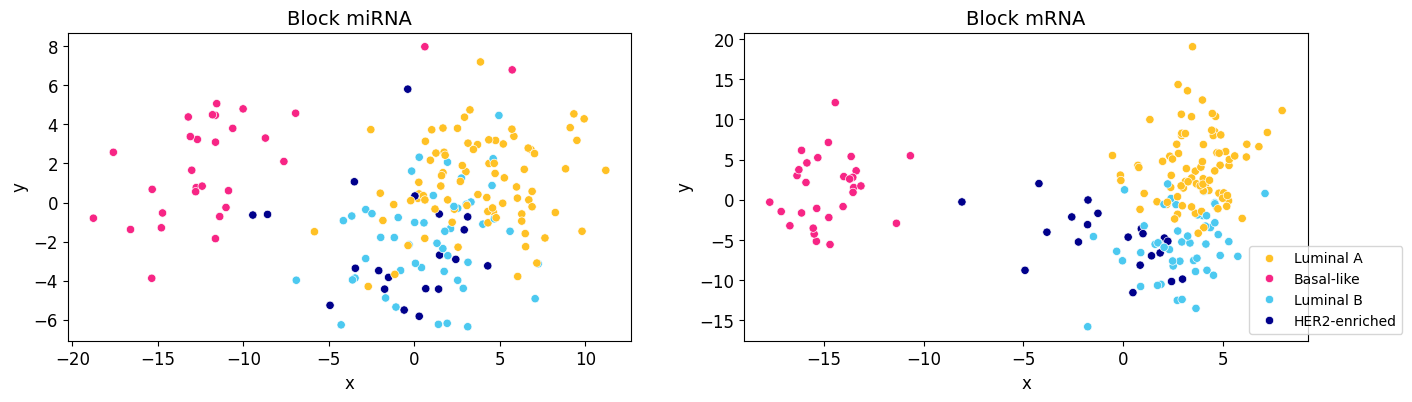

In [61]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 4))
sns.scatterplot( data = data_Indiv_miRNA, x = 'x', y='y', color = data_Indiv_miRNA['col'], hue = 'group', ax = ax[0],
                palette= {'Basal-like': '#F72585', 'HER2-enriched': '#00008B', 'Luminal A': '#FFC125', 'Luminal B': '#4CC9F0'})
ax[0].set_title('Block miRNA', fontsize=14)
ax[0].set_xlabel('x', fontsize=12)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].set_ylabel('y', fontsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].legend().remove()
sns.scatterplot( data = data_Indiv_mRNA, x = 'x', y='y', color = data_Indiv_mRNA['col'], hue = 'group', ax = ax[1],
                palette= {'Basal-like': '#F72585', 'HER2-enriched': '#00008B', 'Luminal A': '#FFC125', 'Luminal B': '#4CC9F0'})
ax[1].set_title('Block mRNA', fontsize=14)
ax[1].set_xlabel('x', fontsize=12)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].set_ylabel('y', fontsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].legend(loc = 'lower right', bbox_to_anchor = (1.18, 0), fontsize = 10)

### ROC curve


In [42]:
data_ROC = pd.read_csv(os.path.join('..', 'PBCM',  'plotsData', 'Plot_AUROC_Data.csv' ))
data_ROC

Unnamed: 0  Specificity  Sensitivity  \
0         miRNA.X..0.39963..Inf.   100.000000   100.000000   
1      miRNA.X..0.4531..0.39963.    96.551724   100.000000   
2      miRNA.X..0.46196..0.4531.    93.103448   100.000000   
3     miRNA.X..0.47924..0.46196.    89.655172   100.000000   
4     miRNA.X..0.49639..0.47924.    86.206897   100.000000   
...                          ...          ...          ...   
1443    mRNA.X..0.0561..0.02165.     0.000000    48.854962   
1444     mRNA.X..0.1013..0.0561.     0.000000    49.618321   
1445     mRNA.X..0.2435..0.1013.     0.000000    50.381679   
1446        mRNA.X..Inf..0.2435.     0.000000    51.145038   
1447                    mRNA.X.3     0.000000    51.908397   

                             Outcome Dataset  
0     Basal-like vs Other(s): 0.9916   miRNA  
1     Basal-like vs Other(s): 0.9916   miRNA  
2     Basal-like vs Other(s): 0.9916   miRNA  
3     Basal-like vs Other(s): 0.9916   miRNA  
4     Basal-like vs Other(s): 0.9916   miRNA  
...                              ...     ...  
1443   Luminal B vs Other(s): 0.8766    mRNA  
1444   Luminal B vs Other(s): 0.8766    mRNA  
1445   Luminal B vs Other(s): 0.8766    mRNA  
1446   Luminal B vs Other(s): 0.8766    mRNA  
1447   Luminal B vs Other(s): 0.8766    mRNA  

[1448 rows x 5 columns]

In [43]:
mask_mRNA = data_ROC['Dataset'] == 'mRNA'
mask_miRNA = data_ROC['Dataset'] == 'miRNA'

In [44]:
data_ROC_mRNA = data_ROC.loc[mask_mRNA]
data_ROC_mRNA

Unnamed: 0  Specificity  Sensitivity  \
724         mRNA.X.1.152..Inf.   100.000000   100.000000   
725       mRNA.X.1.1375.1.152.    96.551724   100.000000   
726       mRNA.X.1.128.1.1375.    93.103448   100.000000   
727       mRNA.X.1.1252.1.128.    89.655172   100.000000   
728      mRNA.X.1.1226.1.1252.    86.206897   100.000000   
...                        ...          ...          ...   
1443  mRNA.X..0.0561..0.02165.     0.000000    48.854962   
1444   mRNA.X..0.1013..0.0561.     0.000000    49.618321   
1445   mRNA.X..0.2435..0.1013.     0.000000    50.381679   
1446      mRNA.X..Inf..0.2435.     0.000000    51.145038   
1447                  mRNA.X.3     0.000000    51.908397   

                            Outcome Dataset  
724       Basal-like vs Other(s): 1    mRNA  
725       Basal-like vs Other(s): 1    mRNA  
726       Basal-like vs Other(s): 1    mRNA  
727       Basal-like vs Other(s): 1    mRNA  
728       Basal-like vs Other(s): 1    mRNA  
...                             ...     ...  
1443  Luminal B vs Other(s): 0.8766    mRNA  
1444  Luminal B vs Other(s): 0.8766    mRNA  
1445  Luminal B vs Other(s): 0.8766    mRNA  
1446  Luminal B vs Other(s): 0.8766    mRNA  
1447  Luminal B vs Other(s): 0.8766    mRNA  

[724 rows x 5 columns]

In [45]:
data_ROC_miRNA = data_ROC.loc[mask_miRNA]
data_ROC_miRNA

Unnamed: 0  Specificity  Sensitivity  \
0        miRNA.X..0.39963..Inf.   100.000000   100.000000   
1     miRNA.X..0.4531..0.39963.    96.551724   100.000000   
2     miRNA.X..0.46196..0.4531.    93.103448   100.000000   
3    miRNA.X..0.47924..0.46196.    89.655172   100.000000   
4    miRNA.X..0.49639..0.47924.    86.206897   100.000000   
..                          ...          ...          ...   
719      miRNA.X.0.4243.0.4378.     0.000000     8.396947   
720       miRNA.X.0.404.0.4243.     0.000000     9.160305   
721       miRNA.X.0.3593.0.404.     0.000000     9.923664   
722        miRNA.X..Inf.0.3593.     0.000000    10.687023   
723                   miRNA.X.3     0.000000    11.450382   

                            Outcome Dataset  
0    Basal-like vs Other(s): 0.9916   miRNA  
1    Basal-like vs Other(s): 0.9916   miRNA  
2    Basal-like vs Other(s): 0.9916   miRNA  
3    Basal-like vs Other(s): 0.9916   miRNA  
4    Basal-like vs Other(s): 0.9916   miRNA  
..                              ...     ...  
719   Luminal B vs Other(s): 0.7644   miRNA  
720   Luminal B vs Other(s): 0.7644   miRNA  
721   Luminal B vs Other(s): 0.7644   miRNA  
722   Luminal B vs Other(s): 0.7644   miRNA  
723   Luminal B vs Other(s): 0.7644   miRNA  

[724 rows x 5 columns]

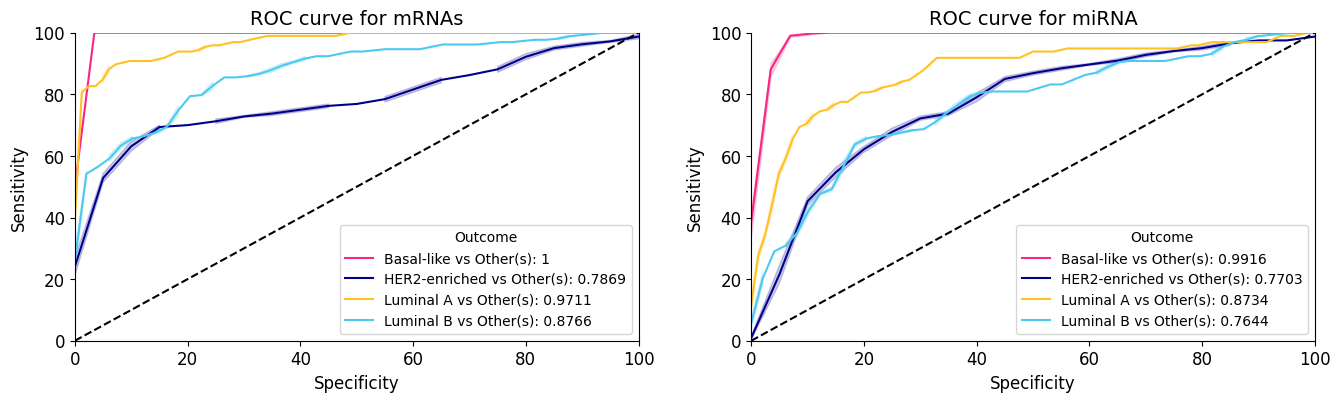

In [59]:
fig, ax = plt.subplots(nrows = 1, ncols =2, figsize = (16, 4))
sns.lineplot(data = data_ROC_mRNA, x= 'Specificity', y = 'Sensitivity', hue= 'Outcome', ax= ax[0], palette= {'Basal-like vs Other(s): 1': '#F72585', 'HER2-enriched vs Other(s): 0.7869': '#00008B', 'Luminal A vs Other(s): 0.9711': '#FFC125', 'Luminal B vs Other(s): 0.8766': '#4CC9F0'})
ax[0].set_xlim(0, 100)
ax[0].set_ylim(0, 100)
ax[0].set_xlabel('Specificity', fontsize=12)
ax[0].set_ylabel('Sensitivity', fontsize=12)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].plot(np.linspace(0, 100, 100), np.linspace(0, 100, 100), linestyle='--', color='black') 
ax[0].set_title('ROC curve for mRNAs', fontsize=14)
ax[0].spines['top'].set_visible(False)
sns.lineplot(data = data_ROC_miRNA, x= 'Specificity', y = 'Sensitivity', hue = 'Outcome', ax=ax[1], palette = {'Basal-like vs Other(s): 0.9916': '#F72585', 'HER2-enriched vs Other(s): 0.7703': '#00008B', 'Luminal A vs Other(s): 0.8734': '#FFC125', 'Luminal B vs Other(s): 0.7644': '#4CC9F0'})
ax[1].plot(np.linspace(0, 100, 100), np.linspace(0, 100, 100), linestyle='--', color='black') 
ax[1].set_xlim(0, 100)
ax[1].set_ylim(0, 100)
ax[1].set_xlabel('Specificity', fontsize=12)
ax[1].set_ylabel('Sensitivity', fontsize=12)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].set_title('ROC curve for miRNA', fontsize=14)
ax[1].spines['top'].set_visible(False)


### Loadings

In [51]:
loadings_comp1_miRNA = pd.read_csv(os.path.join('..', 'PBCM', 'plotsData',  'Loadings_Plot_miRNA_Comp1.csv'))
loadings_comp1_mRNA = pd.read_csv(os.path.join('..', 'PBCM', 'plotsData',  'Loadings_Plot_mRNA_Comp1.csv'))
loadings_comp2_miRNA = pd.read_csv(os.path.join('..', 'PBCM', 'plotsData',  'Loadings_Plot_miRNA_Comp2.csv'))
loadings_comp2_mRNA = pd.read_csv(os.path.join('..', 'PBCM', 'plotsData',  'Loadings_Plot_mRNA_Comp2.csv'))

In [52]:
loadings_comp1_mRNA

Unnamed: 0  Basal.like  HER2.enriched  Luminal.A  Luminal.B  \
0         MLPH   -2.098197       0.247884   0.483012   0.452232   
1        FOXA1   -2.239222       0.317058   0.440448   0.433487   
2         CA12   -1.867865      -0.105422   0.583954   0.524038   
3        GATA3   -1.617162       0.064641   0.481915   0.497843   
4           AR   -1.860710       0.500577   0.484930   0.448341   
..         ...         ...            ...        ...        ...   
115       ORC1    1.373703       0.589242  -0.612127   0.159961   
116       LY6D    1.853357      -0.227888  -0.433084  -0.650481   
117     UBXN10   -1.538402      -0.301956   0.595845   0.264125   
118     RUNDC1   -1.521540      -0.530689   0.608292   0.087901   
119     RNF103   -1.476047       0.014702   0.436176   0.128202   

     Contrib.Basal.like  Contrib.HER2.enriched  Contrib.Luminal.A  \
0                 False                  False               True   
1                 False                  False               True   
2                 False                  False               True   
3                 False                  False              False   
4                 False                   True              False   
..                  ...                    ...                ...   
115                True                  False              False   
116                True                  False              False   
117               False                  False               True   
118               False                  False               True   
119               False                  False               True   

     Contrib.Luminal.B  Contrib   GroupContrib    color  importance  
0                False    False      Luminal A  #C2C2C2    0.278492  
1                False    False      Luminal A  #C2C2C2    0.276213  
2                False    False      Luminal A  #C2C2C2    0.238667  
3                 True    False      Luminal B  #009E73    0.187670  
4                False    False  HER2-enriched  #F68B33    0.180861  
..                 ...      ...            ...      ...         ...  
115              False    False     Basal-like  #388ECC   -0.005742  
116              False    False     Basal-like  #388ECC   -0.004011  
117              False    False      Luminal A  #C2C2C2    0.003218  
118              False    False      Luminal A  #C2C2C2    0.003127  
119              False    False      Luminal A  #C2C2C2    0.000306  

[120 rows x 13 columns]

In [53]:
df_total = [loadings_comp1_miRNA, loadings_comp1_mRNA, loadings_comp2_miRNA, loadings_comp2_mRNA]

for df in df_total:
    df.rename(columns = {'Unnamed: 0': 'Name'}, inplace = True)

In [54]:
'''Function to choose the color of bars, 
based on the BC subtype it is related with.'''

def  choose_color(group):
    match(group):
        case 'Basal-like':
            color = '#F72585'
        case 'HER2-enriched':
            color = '#00008B'
        case 'Luminal A':
            color = '#FFC125'
        case 'Luminal B': 
            color = '#4CC9F0'
    return color

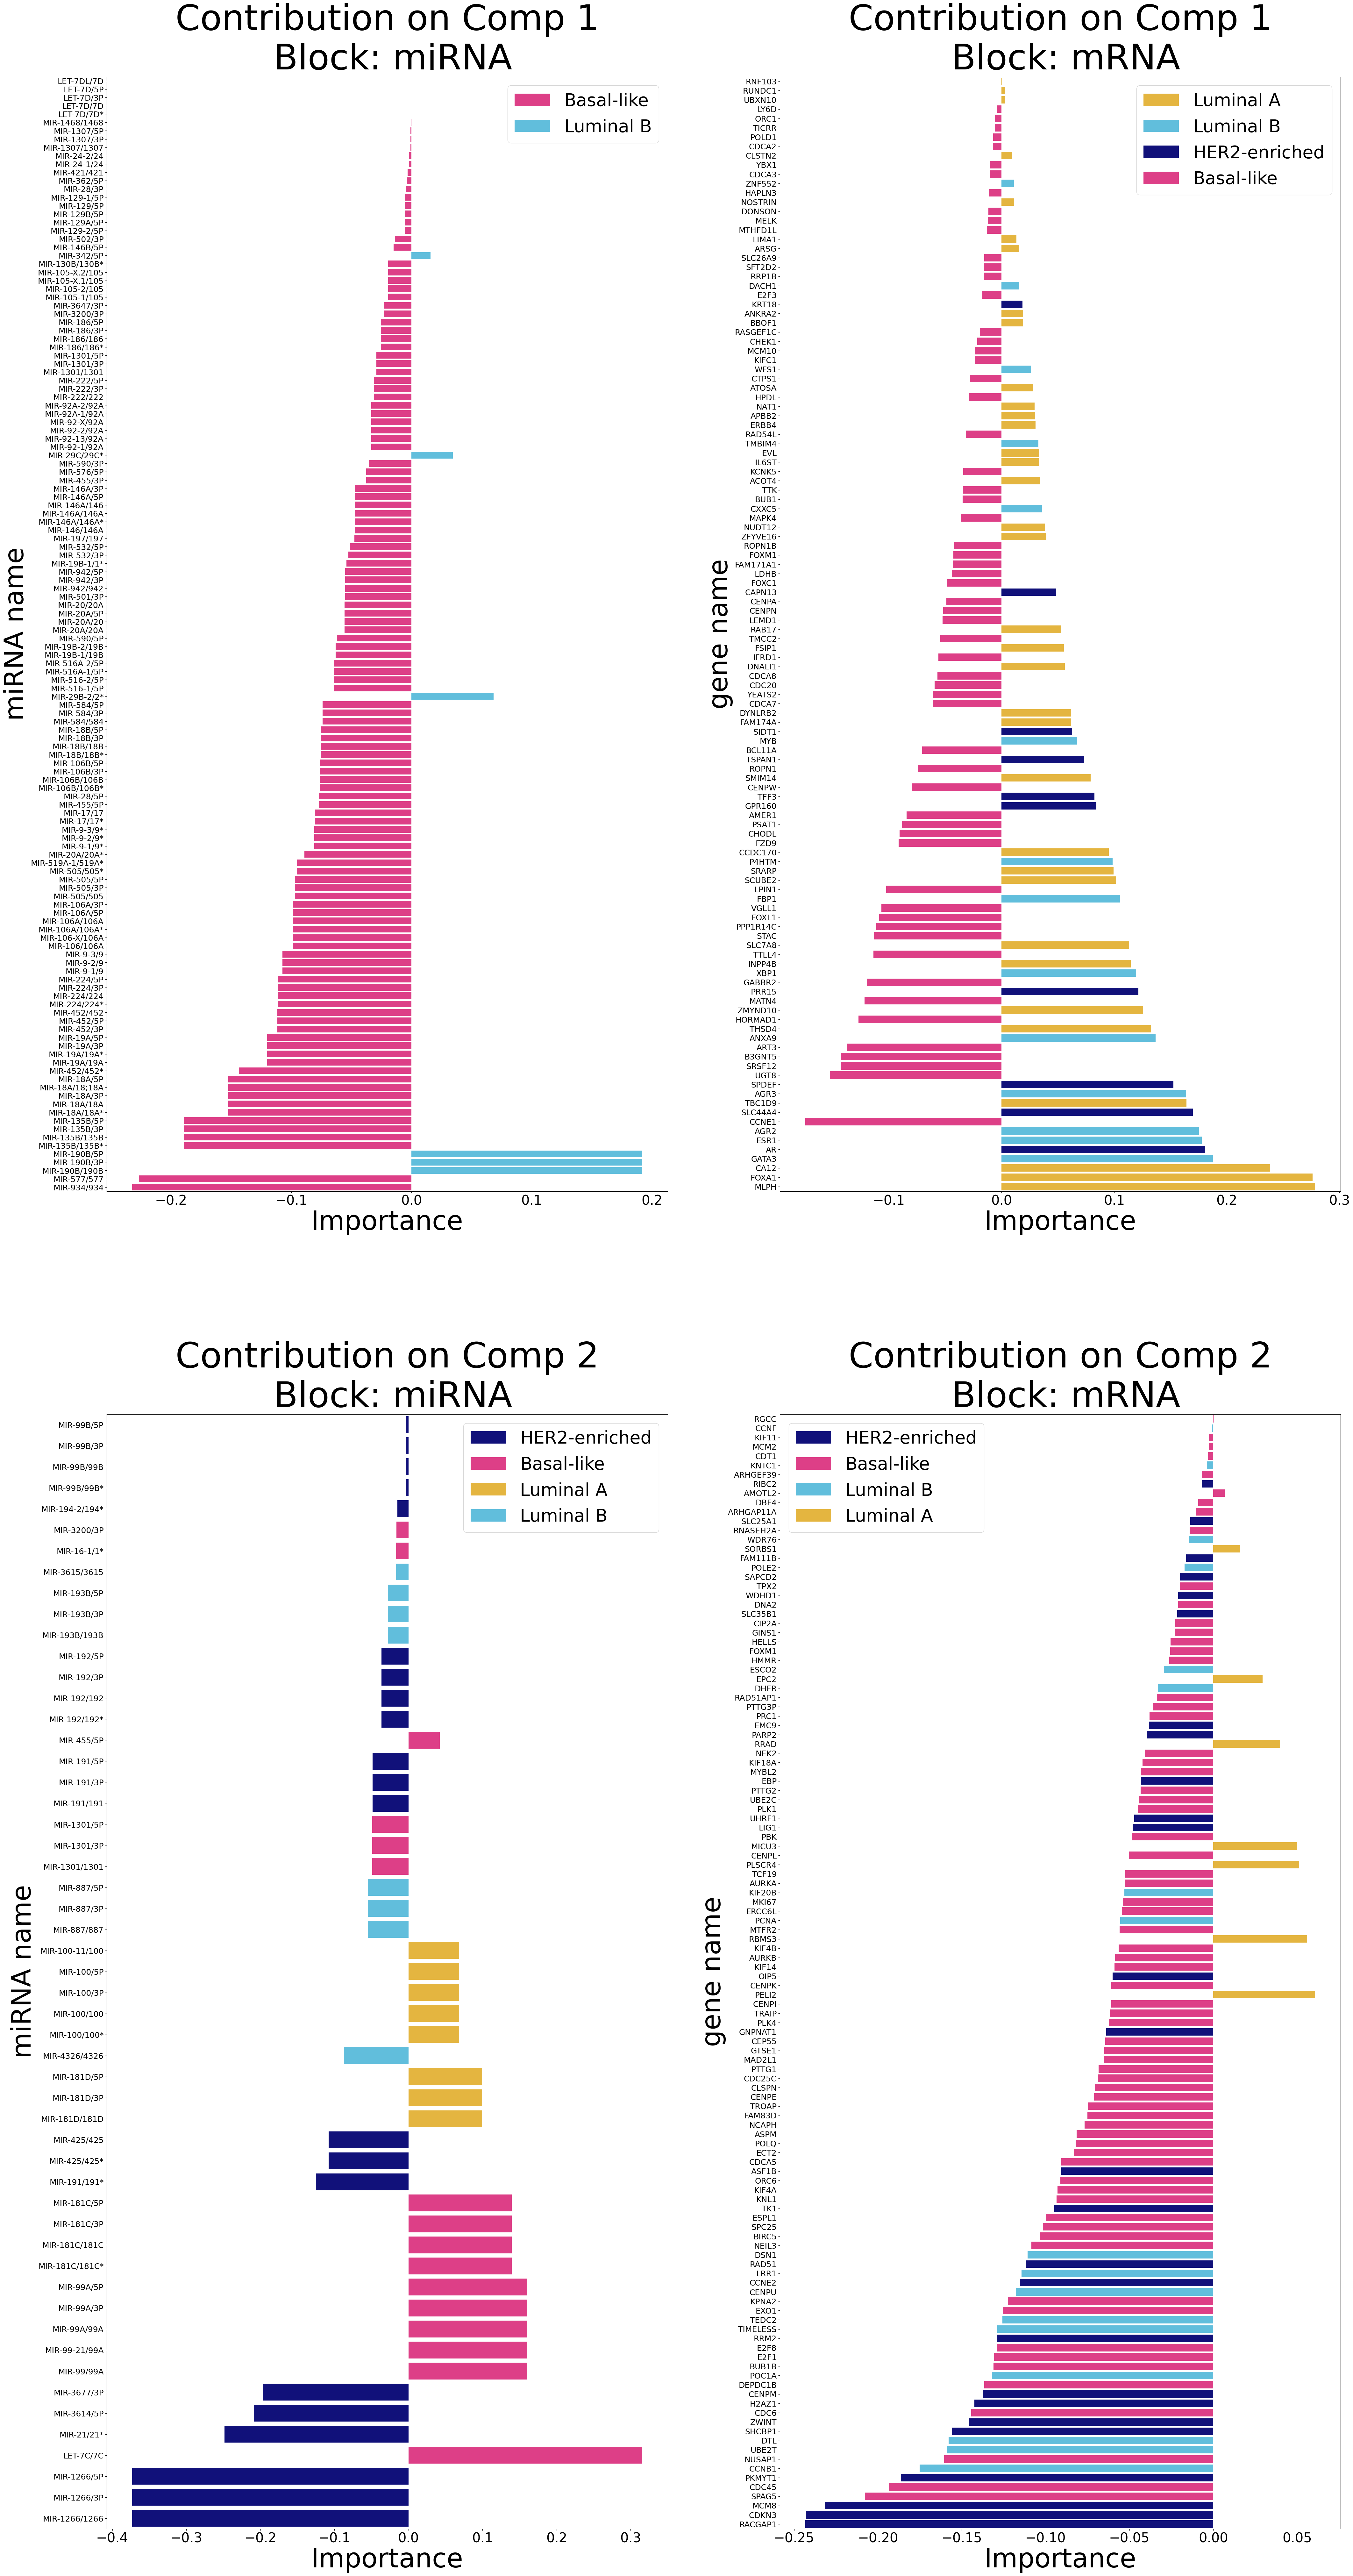

In [69]:
#Full Loadings plot

group_col = 'GroupContrib'

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (50, 100))
n = 1
for df in df_total:
    order_of_bars = df.Name.unique()[::-1]
    if n == 1 or n == 2 :
        comp = 1
    else:
        comp = 2

    if n ==1 or n == 3:
        molecule = 'miRNA'
        molecule_name = 'miRNA'
        y = 0
    else:
        molecule = 'mRNA'
        molecule_name = 'gene'
        y = 1
    for group in df[group_col].unique():
        color = choose_color(group)
        df_filtered = df[(df[group_col] == group)]
        sns.barplot(x='importance', y = 'Name', data = df_filtered, 
                    order = order_of_bars,
                    label = group,
                    ax = ax[comp-1][y], color= color)
        ax[comp-1][y].set_xlabel('Importance', fontsize=60)
        ax[comp-1][y].set_ylabel(str(molecule_name)+ ' name', fontsize=60)
        ax[comp-1][y].set_title('Contribution on Comp ' + str(comp) + '\n Block: ' + str(molecule), fontsize=80)
        ax[comp-1][y].tick_params(axis='x', labelsize=30)
        ax[comp-1][y].tick_params(axis='y', labelsize=18)
        ax[comp-1][y].legend(fontsize = 40)
    n += 1
plt.show()

#### Loadings with PAM50 Annotation

In [70]:
#Obtain the PAM50 genes

file = open('dataBio\\genesPAM50.txt', 'r')
PAM_50 = []
for x in file :
    gene = x.strip()
    PAM_50.append(gene)
file.close()
PAM_50

['UBE2C',
 'PTTG1',
 'MYBL2',
 'BIRC5',
 'CCNB1',
 'TYMS',
 'MELK',
 'CEP55',
 'KNTC2',
 'UBE2T',
 'RRM2',
 'CDC6',
 'ANLN',
 'ORC6L',
 'KIF2C',
 'EXO1',
 'CDCA1',
 'CENPF',
 'CCNE1',
 'MKI67',
 'CDC20',
 'MMP11',
 'GRB7',
 'ERBB2',
 'TMEM45B',
 'BAG1',
 'PGR',
 'MAPT',
 'NAT1',
 'GPR160',
 'FOXA1',
 'BLVRA',
 'CXXC5',
 'ESR1',
 'SLC39A6',
 'KRT17',
 'KRT5',
 'SFRP1',
 'BCL2',
 'KRT14',
 'MLPH',
 'MDM2',
 'FGFR4',
 'MYC',
 'MIA',
 'FOXC1',
 'ACTR3B',
 'PHGDH',
 'CDH3',
 'EGFR']

In [71]:
'''Function to define in which bar
the mark annotating a PAM50 gene
should be.'''

def annotation(genes, pam50):
    an = []
    for gene in genes:
        if gene in pam50:
            an.append('*')
        else:
            an.append('')
    return an

In [72]:
#PAM50 genes in comp 1

genes_comp1 = list(loadings_comp1_mRNA['Name'])
PAM_50_symbols_comp1 = annotation(genes_comp1, PAM_50)
len(PAM_50_symbols_comp1)
PAM_50_symbols_comp1.count('*')

10

In [73]:
#PAM50 genes in comp 2

genes_comp2 = list(loadings_comp2_mRNA['Name'])
PAM_50_symbols_comp2 = annotation(genes_comp2, PAM_50)
len(PAM_50_symbols_comp2)
PAM_50_symbols_comp2.count('*')

11

In [74]:
'''Function to find the position 
of a particular gene in a list.'''

def findpos(gene, a):
    for i in range(0, len(a)):
        if a[i] == gene:
            return i

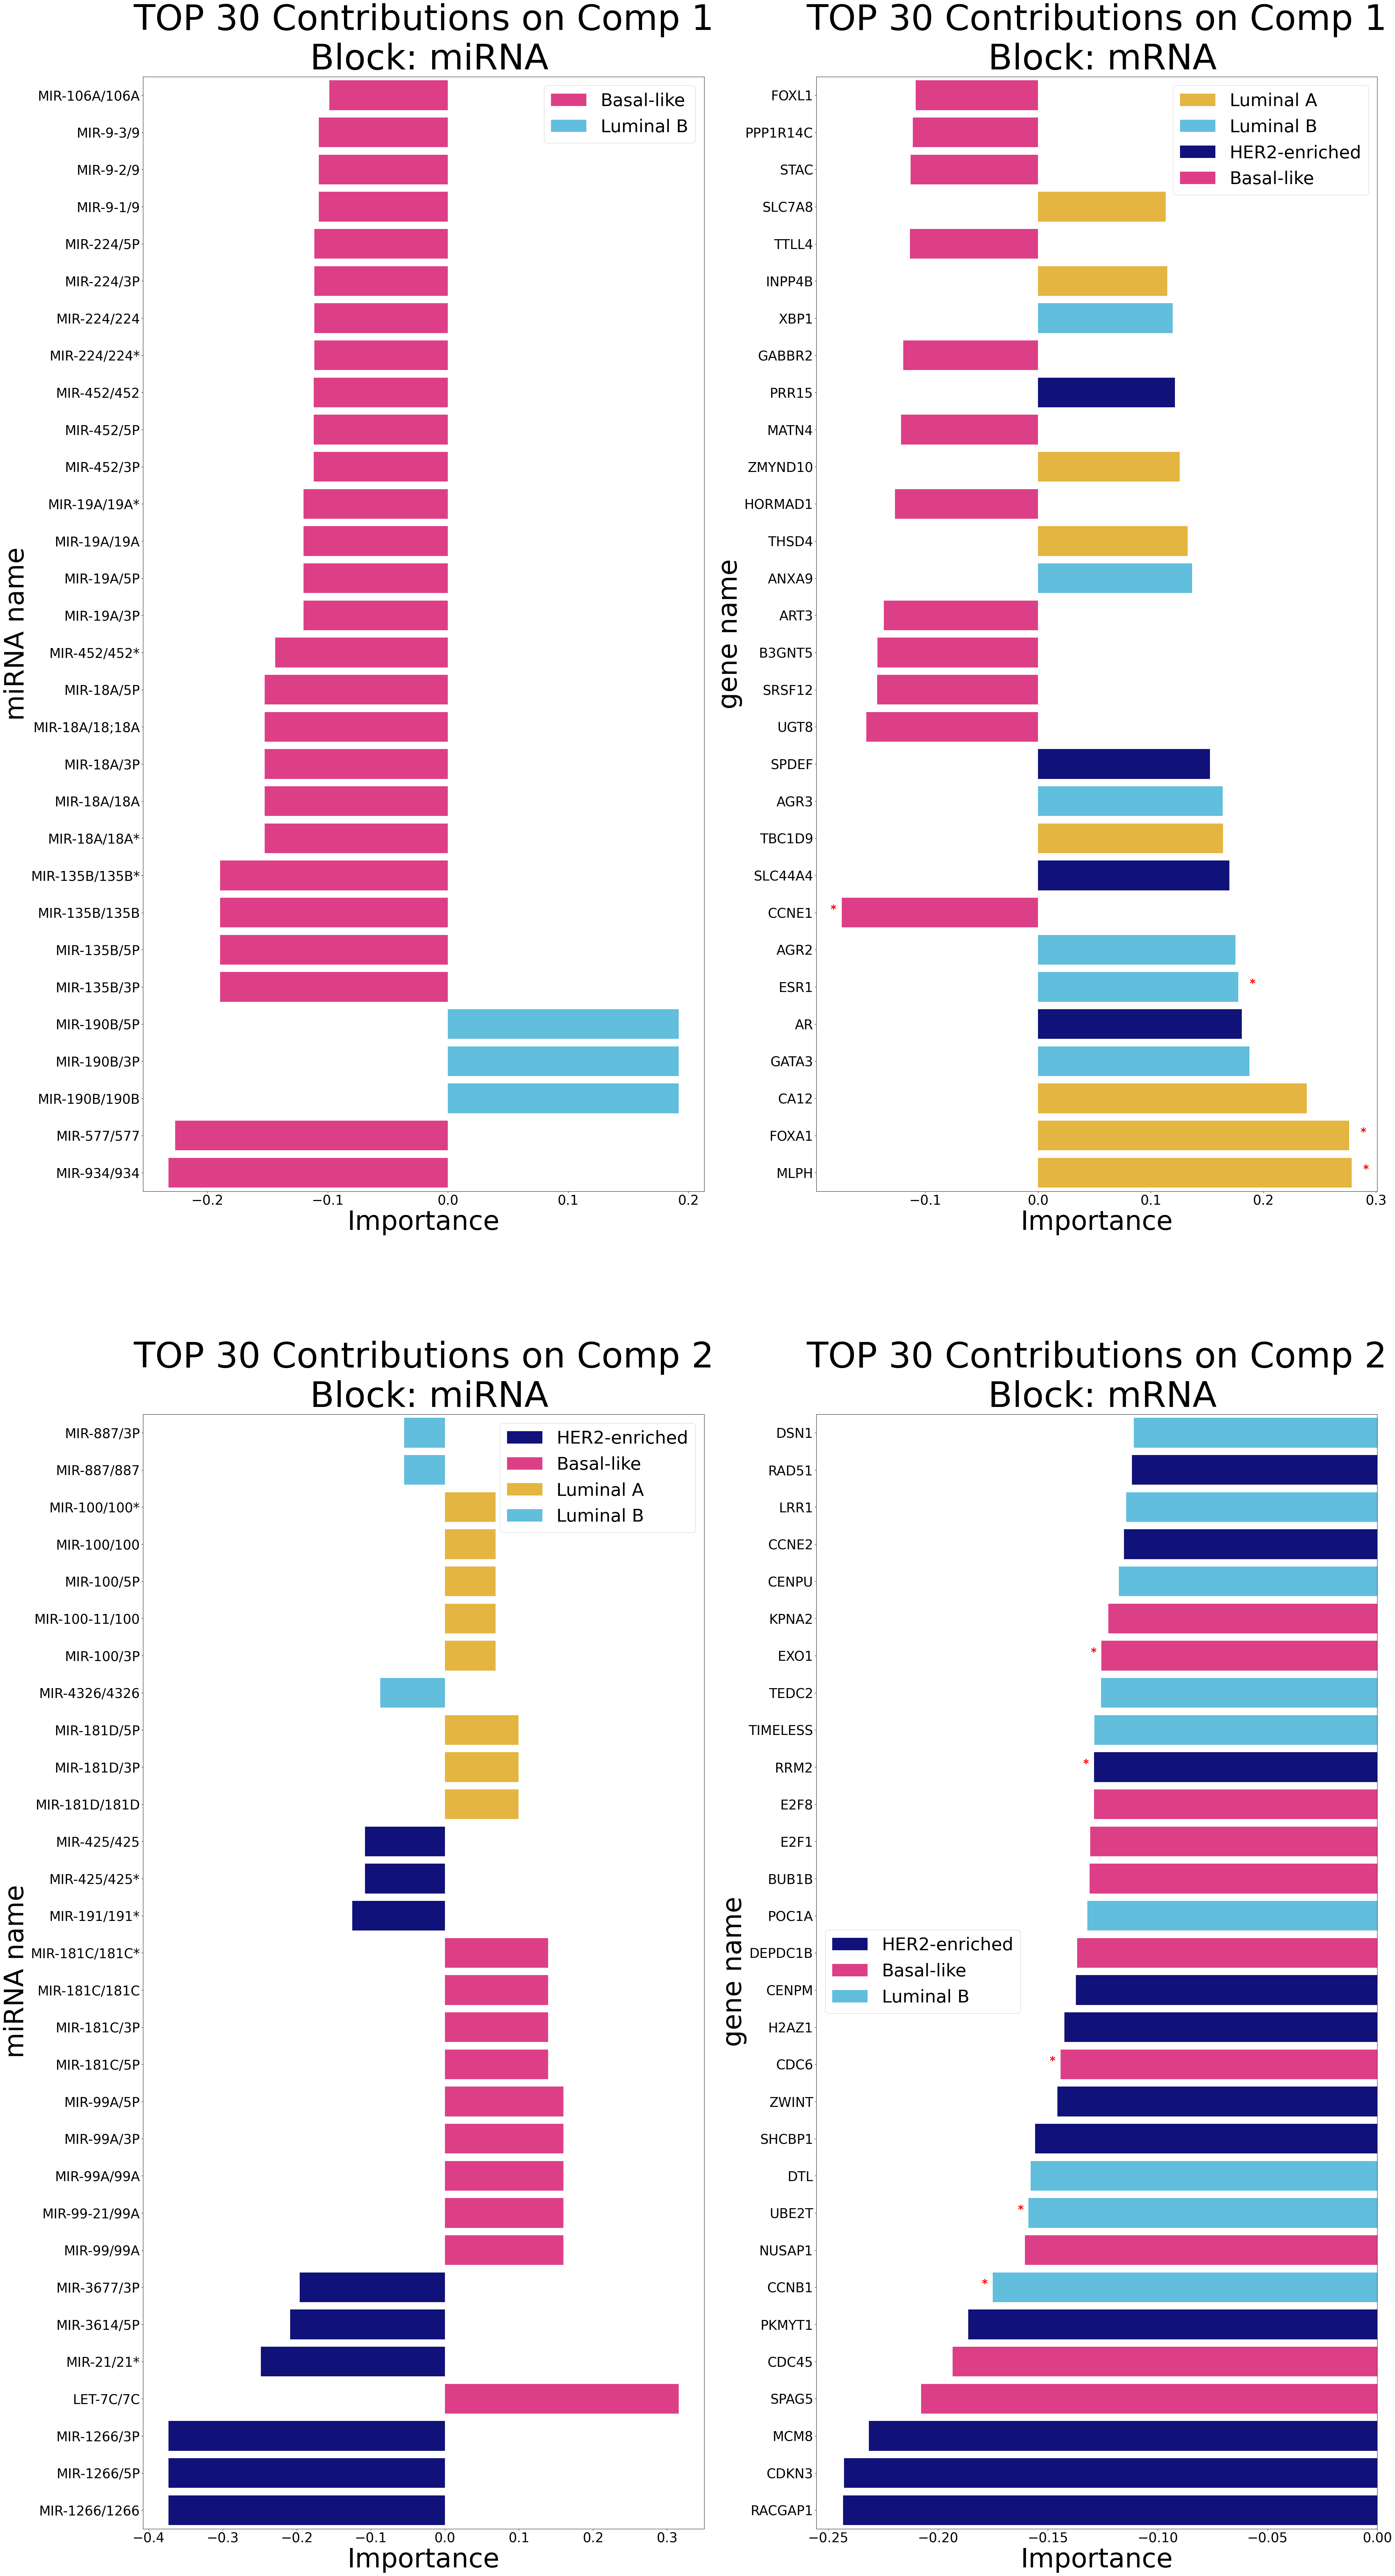

In [80]:
#TOP 30 Contributions

group_col = 'GroupContrib'

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (50, 100))
n = 1
for df_OR in df_total:
    df = df_OR.copy()
    df['importanceB'] = df['importance'].abs()
    df = df.sort_values(by='importanceB', ascending=False).head(30)
    order_of_bars = df.Name.unique()[::-1] #Reverese order
    order_of_bars2 = df.Name.unique()
    if n == 1 or n == 2 :
        comp = 1
        if(n==2):
            PAM_50_symbols_comp1 = df[df['Name'].isin(PAM_50)] 
            pam50_symbols = annotation(order_of_bars2, PAM_50)
    else:
        comp = 2
        if n == 4:
            PAM_50_symbols_comp2 = df[df['Name'].isin(PAM_50)] 
            pam50_symbols = annotation(order_of_bars2, PAM_50)
    if n ==1 or n == 3:
        molecule = 'miRNA'
        molecule_name = 'miRNA'
        y = 0
    else:
        molecule = 'mRNA'
        molecule_name = 'gene'
        y = 1
    for group in df[group_col].unique():
        color = choose_color(group)
        df_filtered = df[(df[group_col] == group)]
        sns.barplot(x='importance', y = 'Name', data = df_filtered, 
                    order = order_of_bars,
                    label = group,
                    ax = ax[comp-1][y], color= color)
    ax[comp-1][y].tick_params(axis='x', labelsize=30)
    ax[comp-1][y].tick_params(axis='y', labelsize=30)
    ax[comp-1][y].set_xlabel('Importance', fontsize=60)
    ax[comp-1][y].set_ylabel(str(molecule_name)+ ' name', fontsize=60)
    ax[comp-1][y].set_title('TOP 30 Contributions on Comp ' + str(comp) + '\n Block: ' + str(molecule), fontsize=80)
    ax[comp-1][y].legend(fontsize = 40)
    if(n==2 or n==4):
        if(n==2):
            scale = 0.01 
            index = list(PAM_50_symbols_comp1['Name'])
        if(n==4):
            scale = 0.005
            index = list(PAM_50_symbols_comp2['Name'])
        count = 0
        for ix, symbol in enumerate(pam50_symbols):
            if(symbol== '*'):
                loading_value = df.loc[ix, 'importance']
            if loading_value > 0: x = loading_value + scale
            else: x = loading_value - scale
            if(symbol== '*'):
                gene = index[count]
                pos = findpos(gene, order_of_bars)
                count += 1
            else: 
                pos = ix
            ax[comp-1][y].text(x, pos, symbol, fontweight = 'bold', fontsize = 25, color = 'r')
    n += 1
plt.show()

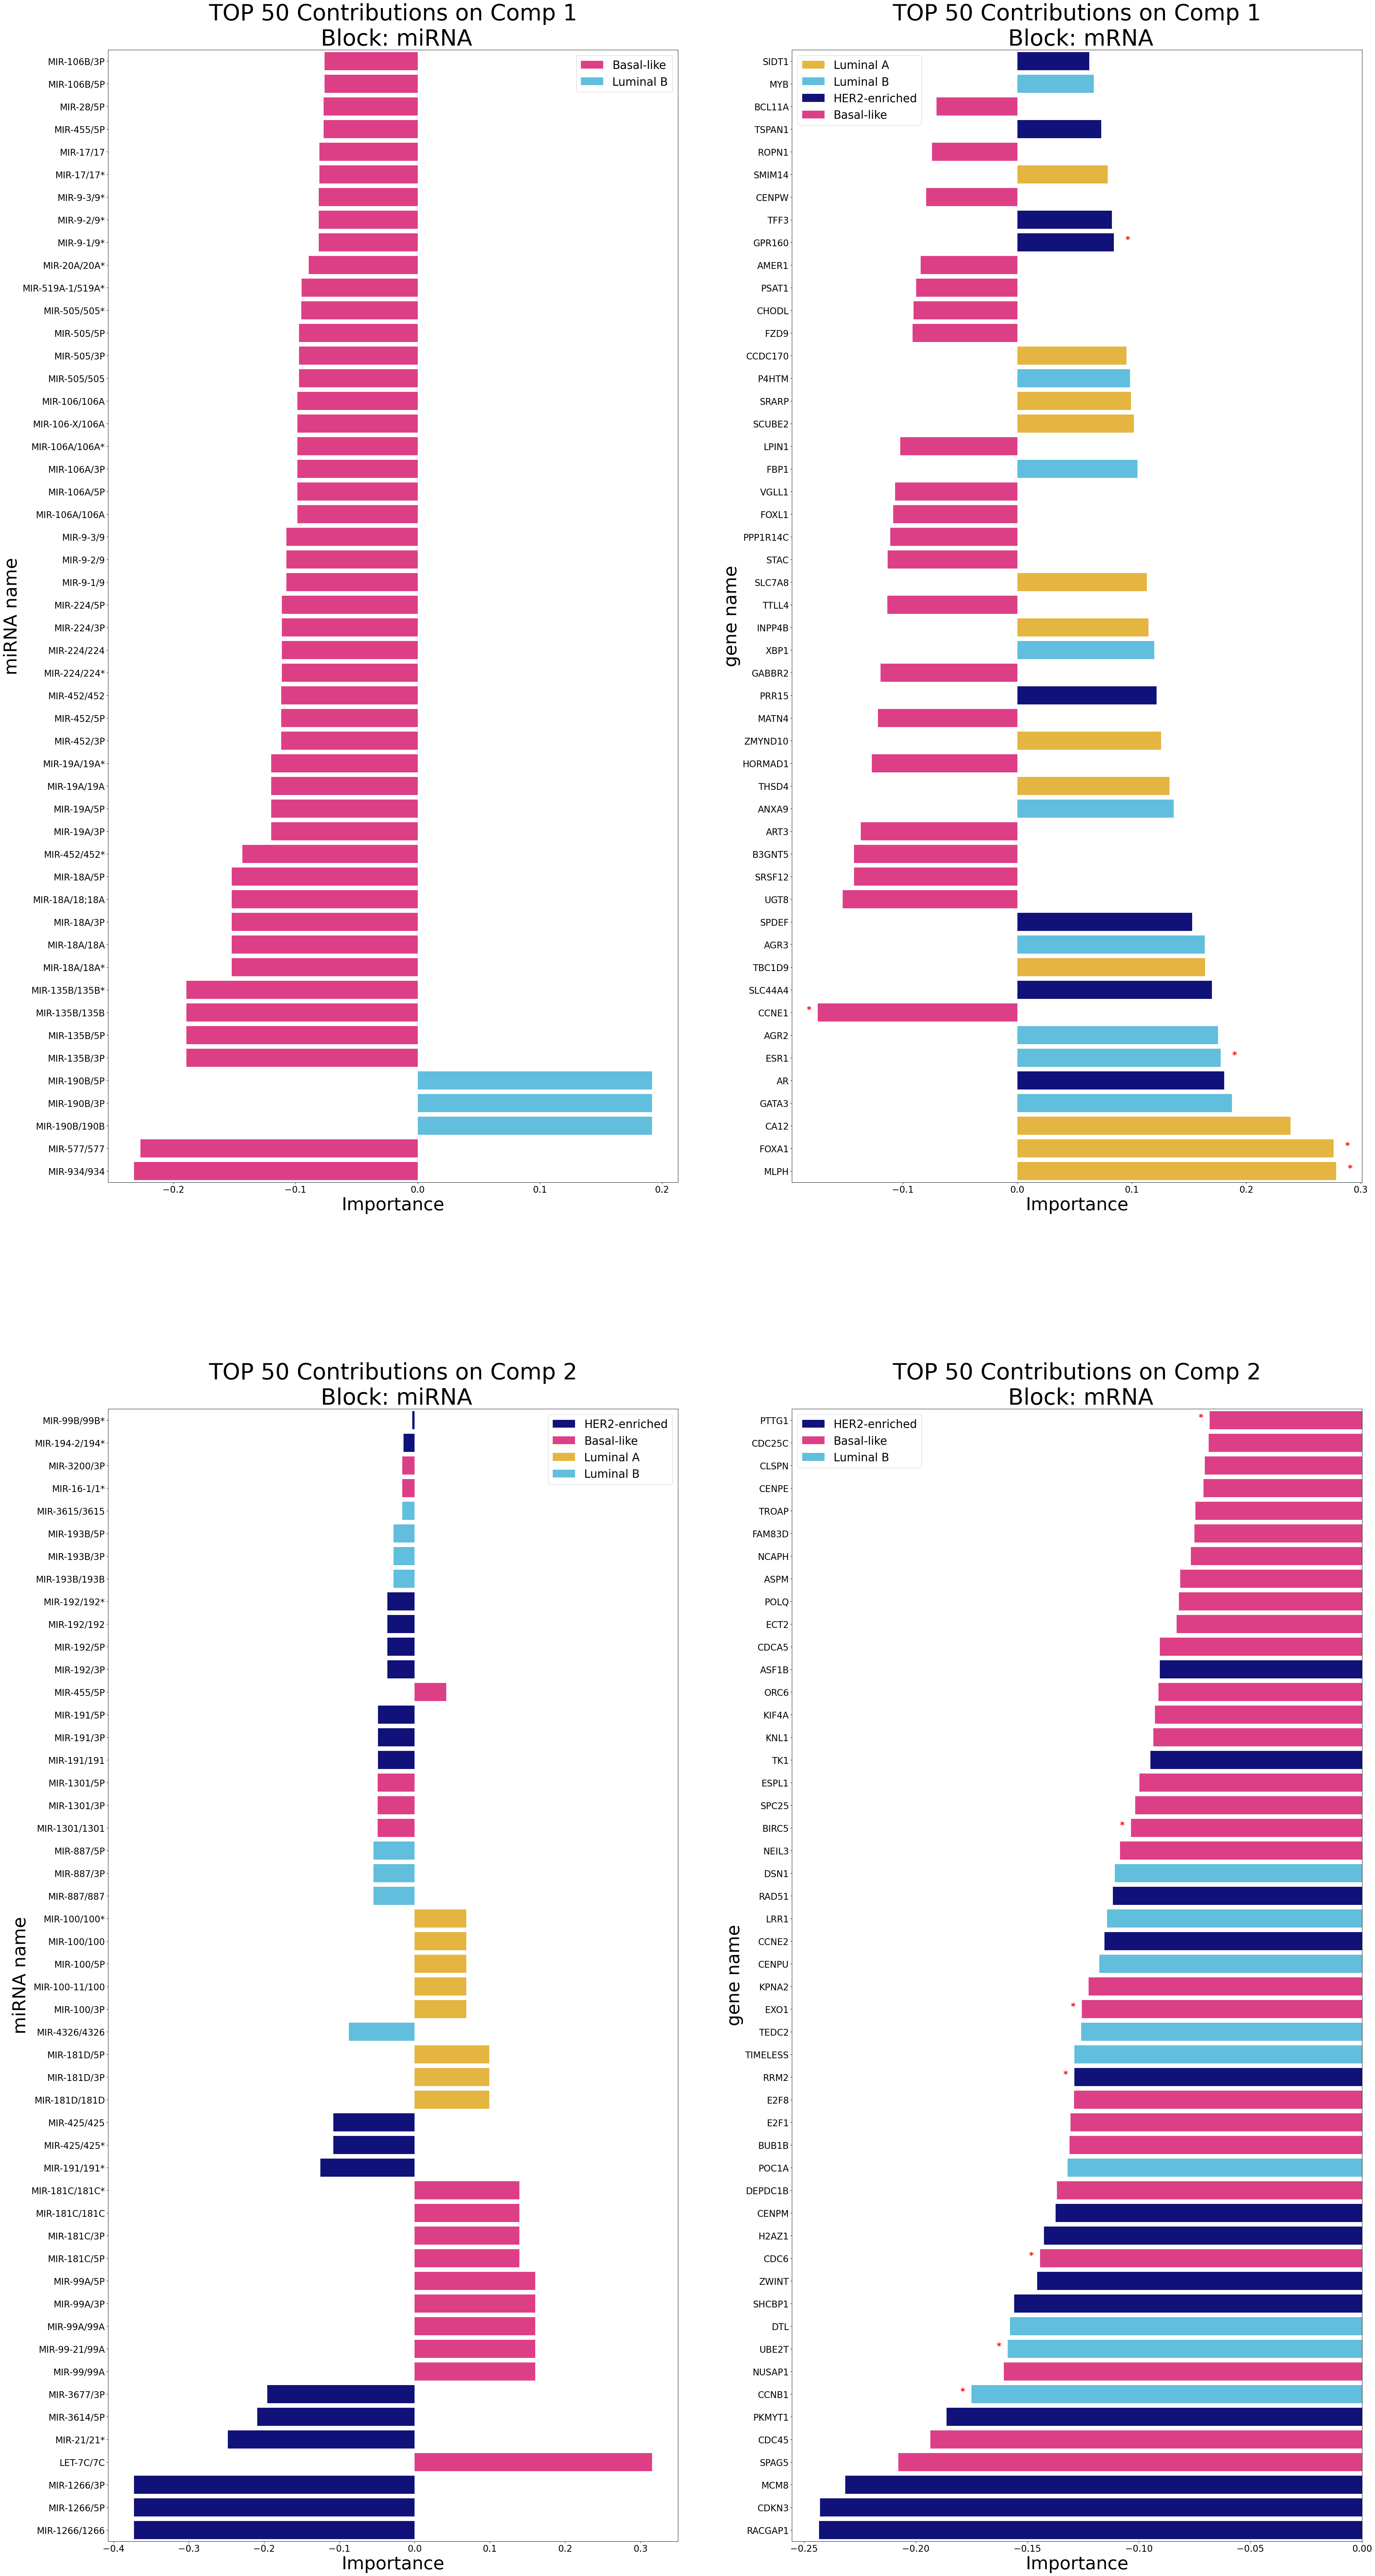

In [43]:
#TOP 50 Contributions

group_col = 'GroupContrib'

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (50, 100))
n = 1
for df_OR in df_total:
    df = df_OR.copy()
    df['importanceB'] = df['importance'].abs()
    df = df.sort_values(by='importanceB', ascending=False).head(50)
    order_of_bars = df.Name.unique()[::-1]
    order_of_bars2 = df.Name.unique()
    if n == 1 or n == 2 :
        comp = 1
        if(n==2):
            PAM_50_symbols_comp1 = df[df['Name'].isin(PAM_50)] 
            pam50_symbols = annotation(order_of_bars2, PAM_50)
    else:
        comp = 2
        if n == 4:
            PAM_50_symbols_comp2 = df[df['Name'].isin(PAM_50)] 
            pam50_symbols = annotation(order_of_bars2, PAM_50)
    if n ==1 or n == 3:
        molecule = 'miRNA'
        molecule_name = 'miRNA'
        y = 0
    else:
        molecule = 'mRNA'
        molecule_name = 'gene'
        y = 1
    for group in df[group_col].unique():
        color = choose_color(group)
        df_filtered = df[(df[group_col] == group)]
        sns.barplot(x='importance', y = 'Name', data = df_filtered, 
                    order = order_of_bars,
                    label = group,
                    ax = ax[comp-1][y], color= color)
    ax[comp-1][y].tick_params(axis='x', labelsize=20)
    ax[comp-1][y].tick_params(axis='y', labelsize=20)
    ax[comp-1][y].set_xlabel('Importance', fontsize=40)
    ax[comp-1][y].set_ylabel(str(molecule_name)+ ' name', fontsize=40)
    ax[comp-1][y].set_title('TOP 50 Contributions on Comp ' + str(comp) + '\n Block: ' + str(molecule), fontsize=50)
    ax[comp-1][y].legend(fontsize = 25)
    if(n==2 or n==4):
        if(n==2):
            scale = 0.01 
            index = list(PAM_50_symbols_comp1['Name'])
        if(n==4):
            scale = 0.005
            index = list(PAM_50_symbols_comp2['Name'])
        count = 0
        for ix, symbol in enumerate(pam50_symbols):
            if(symbol== '*'):
                loading_value = df.loc[ix, 'importance']
            if loading_value > 0: x = loading_value + scale
            else: x = loading_value - scale
            if(symbol== '*'):
                gene = index[count]
                pos = findpos(gene, order_of_bars)
                count += 1
            else: 
                pos = ix
            ax[comp-1][y].text(x, pos, symbol, fontweight = 'bold', fontsize = 20, color = 'r')
    n += 1
plt.show()

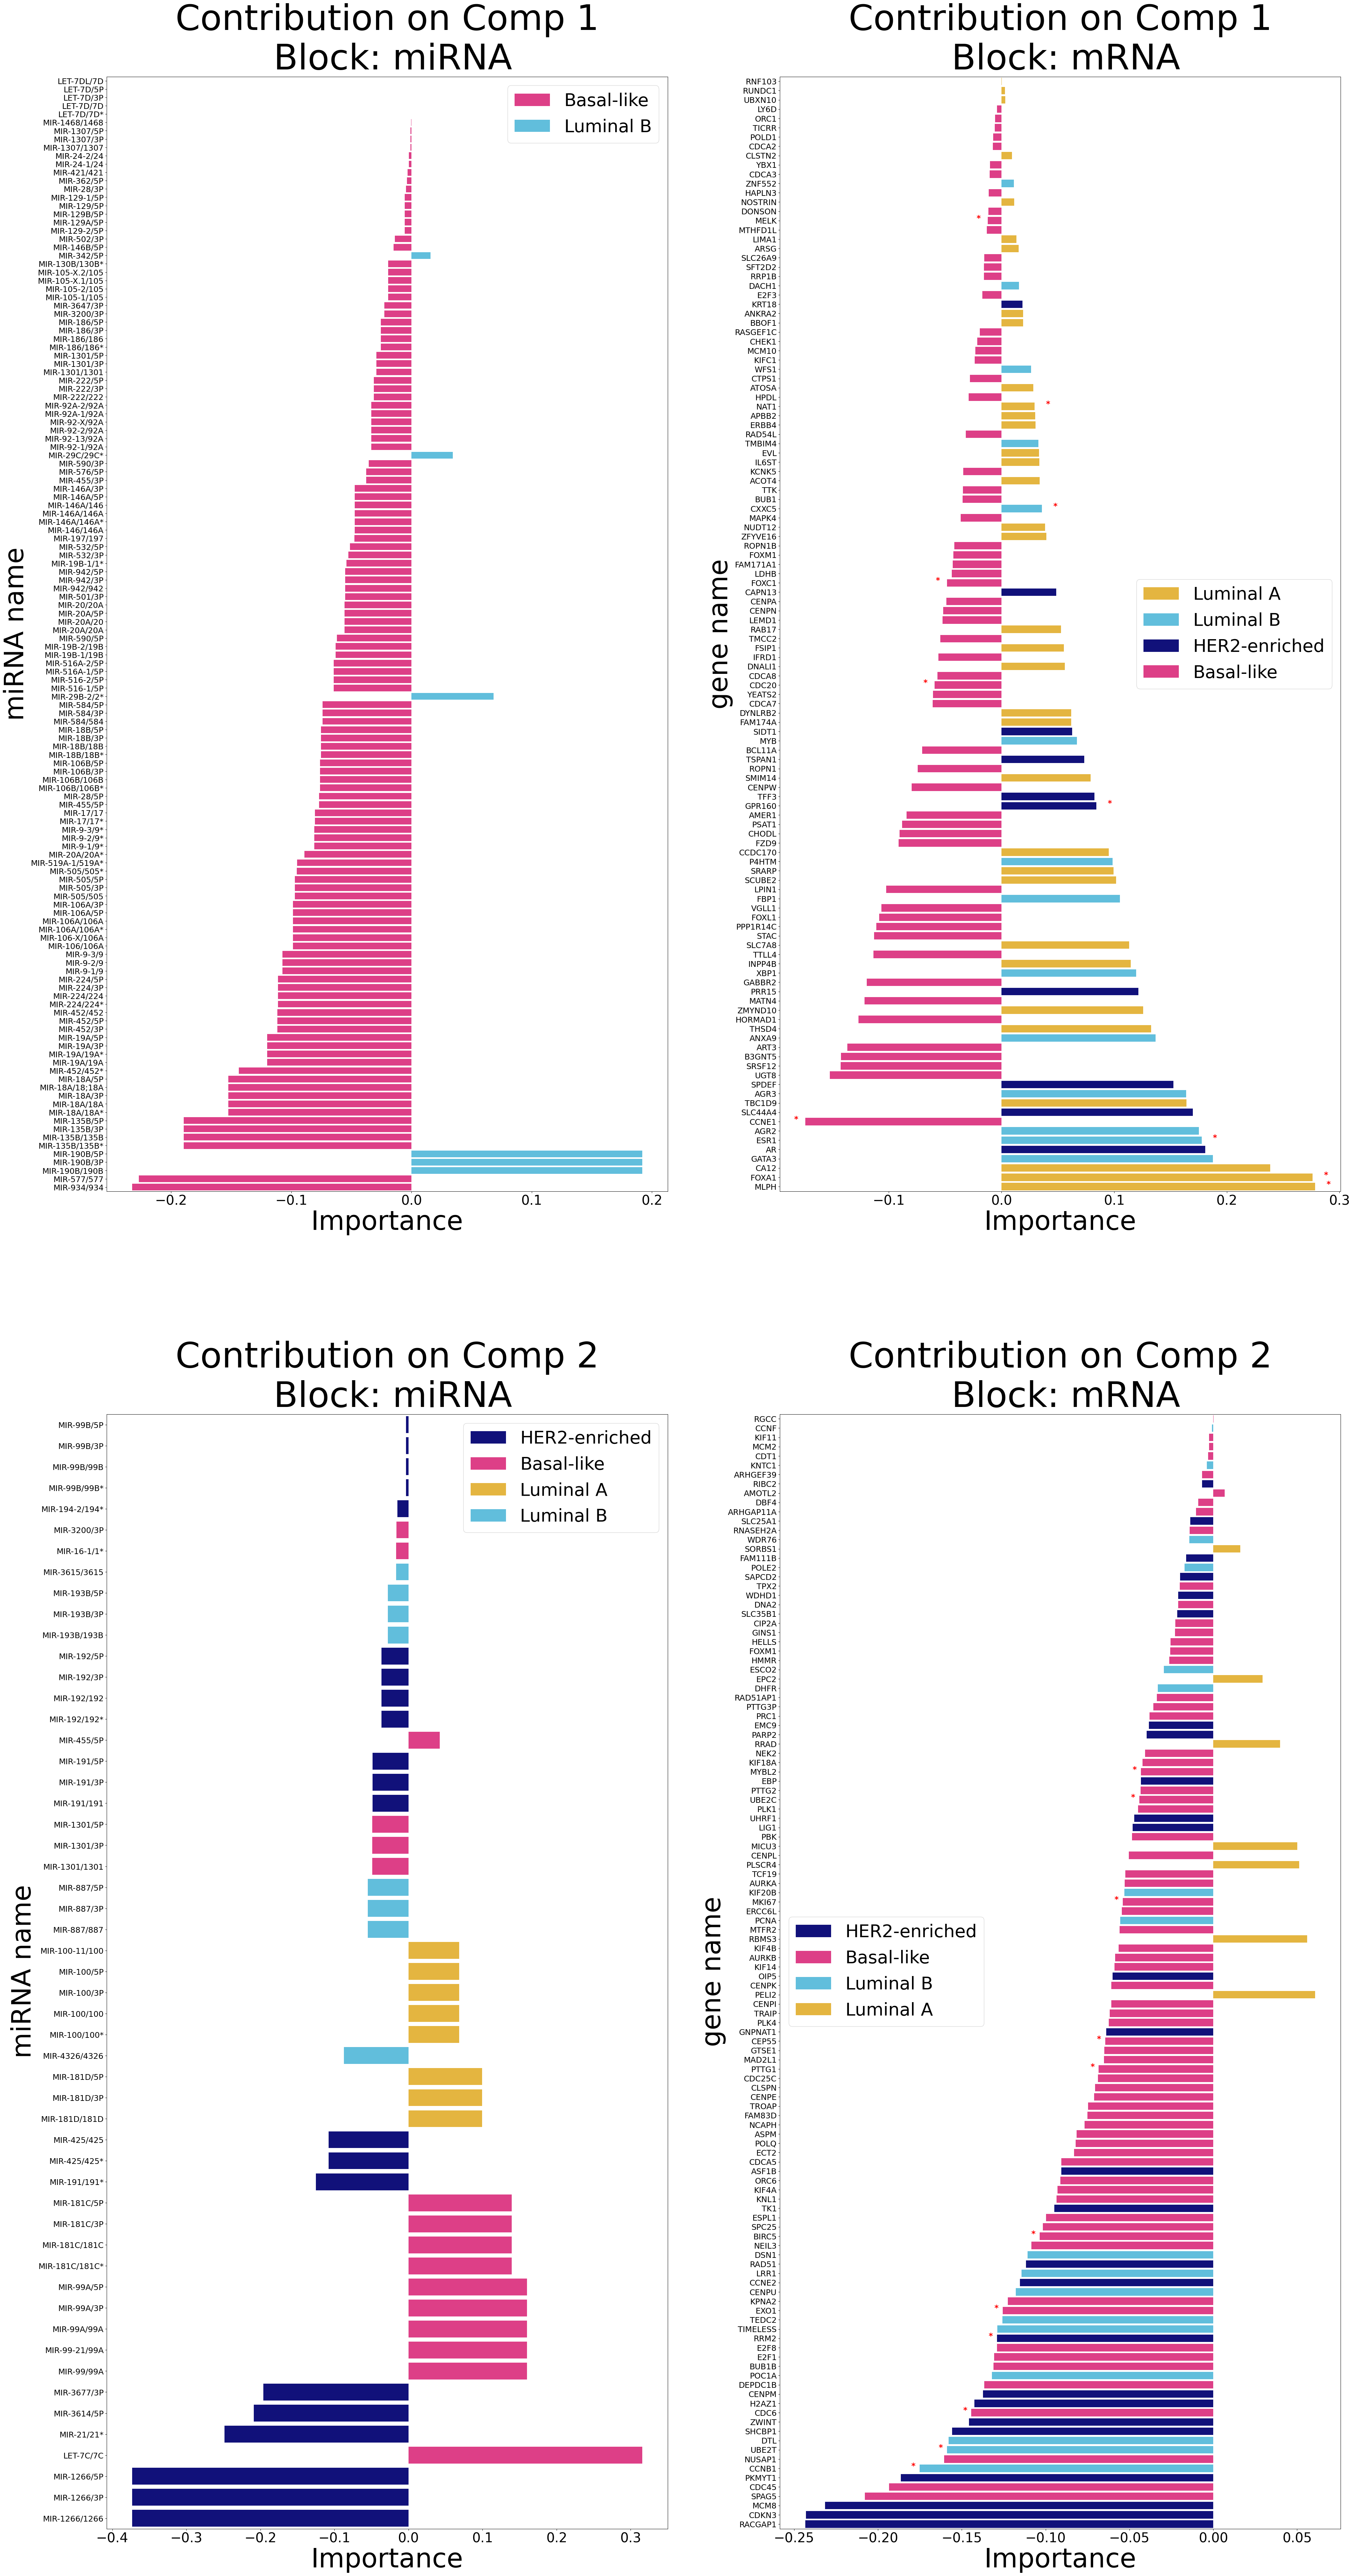

In [83]:
#Full Loadings plot

group_col = 'GroupContrib'

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (50, 100))
n = 1
for df in df_total:
    order_of_bars = df.Name.unique()[::-1]
    order_of_bars2 = df.Name.unique()
    if n == 1 or n == 2 :
        comp = 1
        if(n==2):
            PAM_50_symbols_comp1 = df[df['Name'].isin(PAM_50)] 
            pam50_symbols = annotation(order_of_bars2, PAM_50)
    else:
        comp = 2
        if n == 4:
            PAM_50_symbols_comp2 = df[df['Name'].isin(PAM_50)] 
            pam50_symbols = annotation(order_of_bars2, PAM_50)
    if n ==1 or n == 3:
        molecule = 'miRNA'
        molecule_name = 'miRNA'
        y = 0
    else:
        molecule = 'mRNA'
        molecule_name = 'gene'
        y = 1
    for group in df[group_col].unique():
        color = choose_color(group)
        df_filtered = df[(df[group_col] == group)]
        sns.barplot(x='importance', y = 'Name', data = df_filtered, 
                    order = order_of_bars,
                    label = group,
                    ax = ax[comp-1][y], color= color)
    ax[comp-1][y].set_xlabel('Importance', fontsize=60)
    ax[comp-1][y].set_ylabel(str(molecule_name)+ ' name', fontsize=60)
    ax[comp-1][y].set_title('Contribution on Comp ' + str(comp) + '\n Block: ' + str(molecule), fontsize=80)
    ax[comp-1][y].tick_params(axis='x', labelsize=30)
    ax[comp-1][y].tick_params(axis='y', labelsize=18)
    ax[comp-1][y].legend(fontsize = 40)
    if(n==2 or n==4):
        if(n==2):
            scale = 0.01 
            index = list(PAM_50_symbols_comp1['Name'])
        if(n==4):
            scale = 0.005
            index = list(PAM_50_symbols_comp2['Name'])
        count = 0
        for ix, symbol in enumerate(pam50_symbols):
            if(symbol== '*'):
                loading_value = df.loc[ix, 'importance']
            if loading_value > 0: x = loading_value + scale
            else: x = loading_value - scale
            if(symbol== '*'):
                gene = index[count]
                pos = findpos(gene, order_of_bars)
                count += 1
            else: 
                pos = ix
            ax[comp-1][y].text(x, pos, symbol, fontweight = 'bold', fontsize = 18, color = 'r')
    n += 1
plt.show()